In [62]:
import cv2
import numpy as np
import imutils

from matplotlib import pyplot  as plt

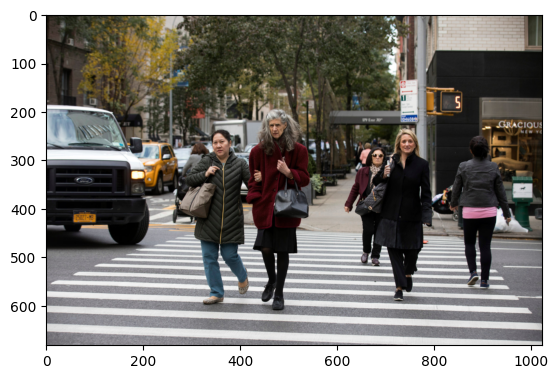

In [63]:
image = cv2.imread('../datasets/pedestrian.jpg')
scale_percent = 0.5
scale_width = int(image.shape[1] * scale_percent)
image = imutils.resize(image=image, width=scale_width)
origin_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

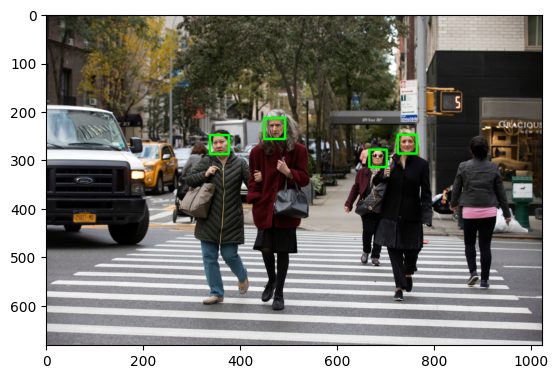

In [64]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
detection_copy = origin_image.copy()
blurred_copy = origin_image.copy()

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30), maxSize=(50, 50))

for x, y, w, h in faces:
    roi = detection_copy[y:y+h, x:x+w]
    blurred_copy[y:y+h, x:x+w] = cv2.blur(roi, (15, 15))
    cv2.rectangle(detection_copy, (x ,y), (x+w, y+h), (0, 255, 0), 4)

plt.imshow(detection_copy)

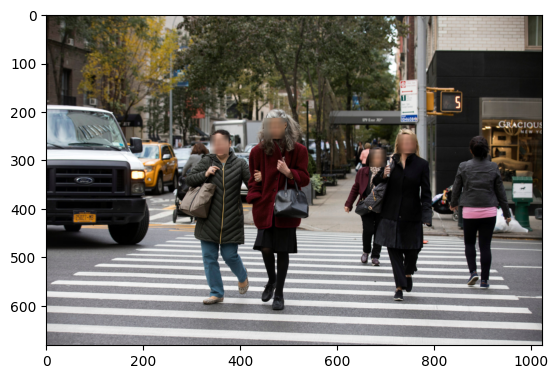

In [65]:
plt.imshow(blurred_copy)